## 3-2. 워드 클라우드로 내용을 한눈에 보기

**워드 클라우드**는 빈도가 높은 단어는 크게, 낮은 단어는 작게 보여줌으로써 한눈에 전체적인 현황을 파악 가능하게 보여주는 것으로, 텍스트 분석 시각화 도구 중 가장 많이 활용되는 방법이다. 

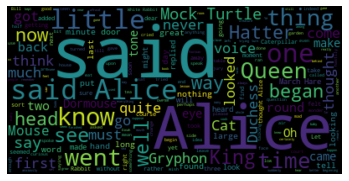

(200, 400, 3)

In [1]:
import matplotlib.pyplot as plt
from nltk.corpus import gutenberg
from wordcloud import WordCloud

doc_alice = gutenberg.open('carroll-alice.txt').read()

# 워드 클라우드 이미지 생성
wordcloud = WordCloud().generate(doc_alice)

plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear") # 이미지를 출력
plt.show()

wordcloud.to_array().shape

파이썬의 WordCloud 패키지 사용법은 매우 간단한데, 객체를 만든 후 generate() 메서드를 호출해 인수로 텍스트를 넘겨주면 된다. 위처럼 문서를 넘겨주면 알아서 토큰화 등의 작업을 한다. generate_from_frequencies() 메서드를 사용하면 계산된 빈도를 이용해서 워드 클라우드를 그릴 수도 있다. 또한, 빈도 수가 높은 단어와 낮은 단어의 폰트 크기가 너무 차이 난다고 생각되면 WordCloud의 max_font_size로 최대 폰트 크기를 제한할 수도 있다.

In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

tokenizer = RegexpTokenizer("[\w']{3,}")
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())

english_stops = set(stopwords.words('english'))
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1

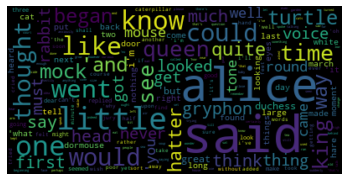

In [3]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

우리 의도가 잘 반영된 워드 클라우드가 만들어지긴 했으나, 이미지 위에 워드 클라우드를 출력하는 것으로 조금 더 멋을 부릴 수도 있다. 이를 위해 먼저 바탕으로 사용할 이미지가 있어야 하고, 이미지를 불러와 워드 클라우드 객체를 만들 때 mask 매개변수에 할당해주면 된다. 아래 코드는 앨리스가 토끼를 쫓아가는 이미지 위에 워드 클라우드를 그린 예로, 이미지 외에 테두리 등에 대한 매개변수가 있으므로 원하는 워드 클라우드 이미지를 얻을 수 있다.

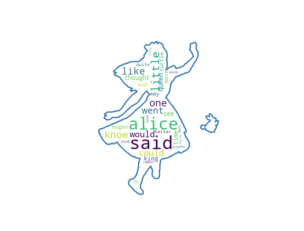

In [4]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png")) # 배경이미지를 불러와서 넘파이 array로 변환

wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3, # 테두리 굵기
               contour_color="steelblue" # 테두리 색
)

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()